In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
DATA_DIR = "../data/functions"
file_prefix = "invocations_per_function_md.anon.d"
DAY = "07" # from ["01", ..., "14"]
MINUTES = 60 * 24

BENCHMARKS_DIR = "../benchmarks"

In [4]:
file = file_prefix + DAY + ".csv"
filepath = os.path.join(DATA_DIR, file)
print("loading " + filepath)
data = pd.read_csv(filepath)
data

loading ../data/functions/invocations_per_function_md.anon.d07.csv


,HashOwner,HashApp,HashFunction,Trigger,1,2,3,4,5,6,...,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440
0,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,7ca324d9fc836a5d4562811c11ce3719530ee919dd1fb9...,520dbd6bd906840012aa0c4b778743efc7c0ac7b7caf96...,http,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,0d0ac65651f54ae3285a59564d64e39238b516fa1d5b56...,115ca7a2b5bc290052c3da74cd0347d19c3c67b7d5aa66...,http,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,a04487a6ba1e14296eb7647e4963180d28bef7a90a8fc5...,93e6c664773bbec3a7f50a0e92fa7e97401a802dc6eed8...,orchestration,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,a04487a6ba1e14296eb7647e4963180d28bef7a90a8fc5...,740c5c767e4b9978ee59a97d1829cfbaf755a47806a311...,http,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,a04487a6ba1e14296eb7647e4963180d28bef7a90a8fc5...,c108b4864b866b38b80d0e4594cc6d038f39668b804a1b...,http,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36026,a56e06eb4762a967bd780967c94c2acf157c9a35fe87c7...,15db3217b0ebb663a95357ff57320a536d0b1221f6fb2e...,2a3e87fbba15f0ebe581f93b1f43a3cb3b677ae209a880...,http,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36027,a56e06eb4762a967bd780967c94c2acf157c9a35fe87c7...,15db3217b0ebb663a95357ff57320a536d0b1221f6fb2e...,d01feeef6c6a03ba8cc96dbfdcb8898106b18acbe9d100...,http,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36028,a56e06eb4762a967bd780967c94c2acf157c9a35fe87c7...,15db3217b0ebb663a95357ff57320a536d0b1221f6fb2e...,d43df62e0448cf994831aba36a262443378c03993bbb7b...,http,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36029,a56e06eb4762a967bd780967c94c2acf157c9a35fe87c7...,15db3217b0ebb663a95357ff57320a536d0b1221f6fb2e...,d6a50fa610274244b42a39dcb31f28a699dc289ce5e782...,http,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
def plot_histogram(invocations_per_minute, div=60):
    plot_data = []
    for minute, invocations in enumerate(invocations_per_minute):
        plot_data.extend([minute // div] * invocations)
    bins = (len(invocations_per_minute) - 1) // div + 1
    plt.hist(plot_data, bins=bins, color='skyblue', edgecolor='black')
    plt.title('Invocations per minute')
    plt.xlabel(f'Time (sampled every {div} minutes)')
    plt.ylabel('Invocations')
    plt.grid(True)
    plt.show()

In [6]:
def functions_trace(function_id):
    return data.iloc[function_id].tolist()[4:]

function id: 2928
Total number of invocations: 13


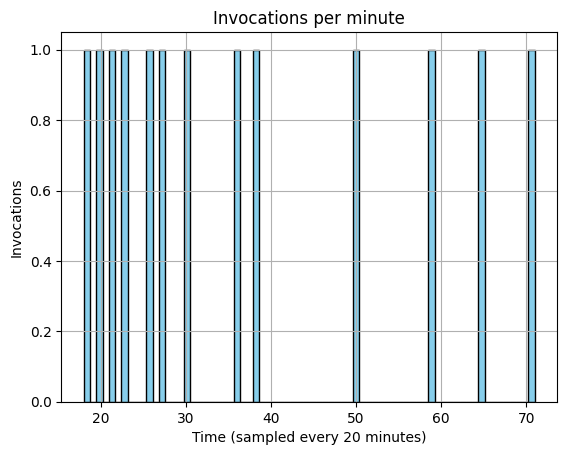

In [7]:
function_id = np.random.randint(0, len(data))
print(f"function id: {function_id}")

invocations_per_minute = functions_trace(function_id)
invocations_per_minute

print(f'Total number of invocations: {sum(invocations_per_minute)}')

plot_histogram(invocations_per_minute, 20)

In [8]:
# TODO: make a separate file with all models.

benchmarks_path = os.path.join(BENCHMARKS_DIR, 'dnn_latency.csv')
print(f'loading benchmarks from {benchmarks_path}')
benchmark_data = pd.read_csv(benchmarks_path)

benchmark_data

loading benchmarks from ../benchmarks/dnn_latency.csv


,Model,Instance,GPU,Latency (ms)
0,Stable diffusion v2,g5.xlarge,NVIDIA A10G,1170.00
1,Stable diffusion v2,g5.4xlarge,NVIDIA A10G,1180.00
2,Stable diffusion v2,g5.16xlarge,NVIDIA A10G,1190.00
3,Stable diffusion v2,g5.8xlarge,NVIDIA A10G,1190.00
4,Stable diffusion v2,g5.2xlarge,NVIDIA A10G,1190.00
...,...,...,...,...
177,Inception-ResNet-v2,c5a.8xlarge,AMD EPYC,71.52
178,Inception-ResNet-v2,c6g.4xlarge,Amazon Graviton2,78.80
179,Inception-ResNet-v2,c5a.24xlarge,AMD EPYC,79.00
180,Inception-ResNet-v2,c5a.4xlarge,AMD EPYC,80.41


In [9]:
benchmark_models = list(set(benchmark_data['Model']))
benchmark_models

['Stable diffusion v2',
 'Whisper',
 'Resnet18',
 'SqueezeNet',
 'Inception-ResNet-v2',
 'MobileNet-V1',
 'VGG-19',
 'VGG16',
 'VGG-16',
 'DenseNet-169']

In [10]:
def assign_traces_to_models(data, benchmark_models, model_to_assignments):
    assignments = {}
    print("model to function_ids:")
    for model in benchmark_models:
        num_traces = model_to_assignments(model)
        function_ids = np.random.randint(0, len(data), size=num_traces)
        print(f'{model}: {function_ids}')
        traces = list(map(functions_trace, function_ids))
        assignments[model] = traces
    return assignments
        

In [29]:
def workload_distribution_plot(model_assignments):
    columns = list(model_assignments.keys())
    values = [sum(map(sum, traces)) for traces in model_assignments.values()]

    plt.barh(columns, values)
    plt.xlabel('Total number of invocations')
    plt.ylabel('Model')
    plt.show()

model to function_ids:
Stable diffusion v2: [17300 18466  3441 32185 30264]
Whisper: [ 6869  4287 25173 32211 16804]
Resnet18: [21229 23759 31542 11147 30620]
SqueezeNet: [ 8198  7051 21360  8715 33009]
Inception-ResNet-v2: [ 9518 29821  6914 13764  5895]
MobileNet-V1: [31802  8360 15942 18184 33695]
VGG-19: [20071  2120 23316 16245 28656]
VGG16: [16390 22788  7721  8293 22358]
VGG-16: [ 6148  3144  1039 31533 31526]
DenseNet-169: [ 6582 24504 20274 35984 14505]
------------ workload_distribution_plot -------------


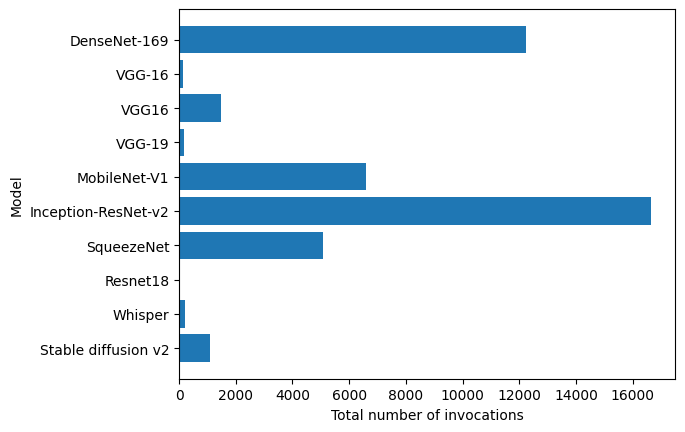

In [32]:
def constant_5(model):
    return 5

assignments = assign_traces_to_models(data, benchmark_models, constant_5)

print("------------ workload_distribution_plot -------------")
workload_distribution_plot(assignments)